## ***Imports***

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


## **Loading data sets**

In [2]:
# Load two common datasets: MNIST and Fashion MNIST
(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = mnist.load_data()
(x_fashion_train, y_fashion_train), (x_fashion_test, y_fashion_test) = fashion_mnist.load_data()

## **Data Preprocessing for MNIST**


In [3]:
# Normalize the pixels between 0 and 1
x_mnist_train = x_mnist_train / 255.0
x_mnist_test = x_mnist_test / 255.0

# Reshaping the data
x_mnist_train = x_mnist_train.reshape(x_mnist_train.shape[0], 28, 28, 1)
x_mnist_test = x_mnist_test.reshape(x_mnist_test.shape[0], 28, 28, 1)

# ONE_HOT encoding
y_mnist_train = to_categorical(y_mnist_train, 10)
y_mnist_test = to_categorical(y_mnist_test, 10)

## **Data Preprocessing for FASHION_MNIST**


In [4]:
# Normalize the pixel values to be between 0 and 1
x_fashion_train = x_fashion_train / 255.0
x_fashion_test = x_fashion_test / 255.0

# Reshape the data
x_fashion_train = x_fashion_train.reshape(x_fashion_train.shape[0], 28, 28, 1)
x_fashion_test = x_fashion_test.reshape(x_fashion_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_fashion_train = to_categorical(y_fashion_train, 10)
y_fashion_test = to_categorical(y_fashion_test, 10)

## **Spliting the data training and validation sets**


In [5]:
x_mnist_train, x_mnist_val, y_mnist_train, y_mnist_val = train_test_split(x_mnist_train, y_mnist_train, test_size=0.2, random_state=42)
x_fashion_train, x_fashion_val, y_fashion_train, y_fashion_val = train_test_split(x_fashion_train, y_fashion_train, test_size=0.2, random_state=42)

## **LeNet-5 Model**


In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, (5, 5), activation='relu'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## **LeNet-5 architecture**


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

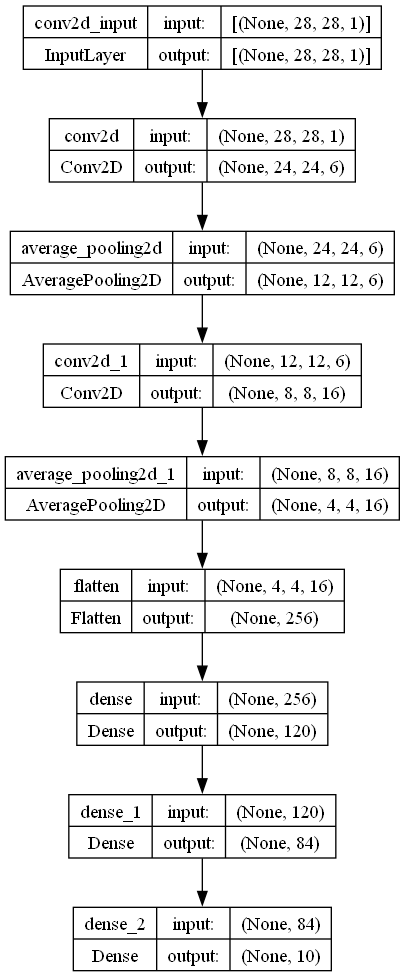

In [8]:
plot_model(model, to_file='lenet5.png', show_shapes=True, show_layer_names=True)

## **Print the number of Trainable parameters in each layer**


In [9]:
for layer in model.layers:
    print(f"{layer.name}: {layer.count_params()}")

conv2d: 156
average_pooling2d: 0
conv2d_1: 2416
average_pooling2d_1: 0
flatten: 0
dense: 30840
dense_1: 10164
dense_2: 850


## **Compile, training and evaluating the model**


In [10]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model on MNIST dataset
model.fit(x_mnist_train, y_mnist_train, epochs=10, validation_data=(x_mnist_val, y_mnist_val))

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2602 - accuracy: 0.9217 - val_loss: 0.1030 - val_accuracy: 0.9679
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0809 - accuracy: 0.9750 - val_loss: 0.0687 - val_accuracy: 0.9793
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0583 - val_accuracy: 0.9830
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0505 - val_accuracy: 0.9856
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0425 - val_accuracy: 0.9892
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0560 - val_accuracy: 0.9856
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0474 - val_ac

In [12]:
# Evaluate the model on MNIST (test set)
mnist_test_loss, mnist_test_acc = model.evaluate(x_mnist_test, y_mnist_test)
print("MNIST Test Accuracy:", mnist_test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0343 - accuracy: 0.9894
MNIST Test Accuracy: 0.9894000291824341


In [13]:
# Train the model on FASHION_MNIST dataset
model.fit(x_fashion_train, y_fashion_train, epochs=10, validation_data=(x_fashion_val, y_fashion_val))

Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5047 - accuracy: 0.8171 - val_loss: 0.3997 - val_accuracy: 0.8558
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3503 - accuracy: 0.8706 - val_loss: 0.3412 - val_accuracy: 0.8804
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3098 - accuracy: 0.8856 - val_loss: 0.3364 - val_accuracy: 0.8807
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2841 - accuracy: 0.8957 - val_loss: 0.3202 - val_accuracy: 0.8876
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2647 - accuracy: 0.9018 - val_loss: 0.3192 - val_accuracy: 0.8832
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2491 - accuracy: 0.9054 - val_loss: 0.3189 - val_accuracy: 0.8872
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2338 - accuracy: 0.9125 - val_loss: 0.3055 - val_ac

In [14]:
# Evaluate the model on FASHION_MNIST (test set)
fashion_test_loss, fashion_test_acc = model.evaluate(x_fashion_test, y_fashion_test)
print("Fashion MNIST Test Accuracy:", fashion_test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.8923
Fashion MNIST Test Accuracy: 0.892300009727478


## ------------------------------------------------------/////////////////////////////////////////------------------------------------------------------

## **Confusion Matrix**


In [15]:
y_pred = model.predict(x_fashion_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(np.argmax(y_fashion_test, axis=1), y_pred_classes)


313/313 [==============================] - 1s 3ms/step


## **Precision, Recall, and F1 Score**


In [16]:
precision = precision_score(np.argmax(y_fashion_test, axis=1), y_pred_classes, average='macro')
recall = recall_score(np.argmax(y_fashion_test, axis=1), y_pred_classes, average='macro')
f1 = f1_score(np.argmax(y_fashion_test, axis=1), y_pred_classes, average='macro')


In [17]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8916924098652489
Recall: 0.8923
F1 Score: 0.8908977691568554


## **Plot the confusion matrix**


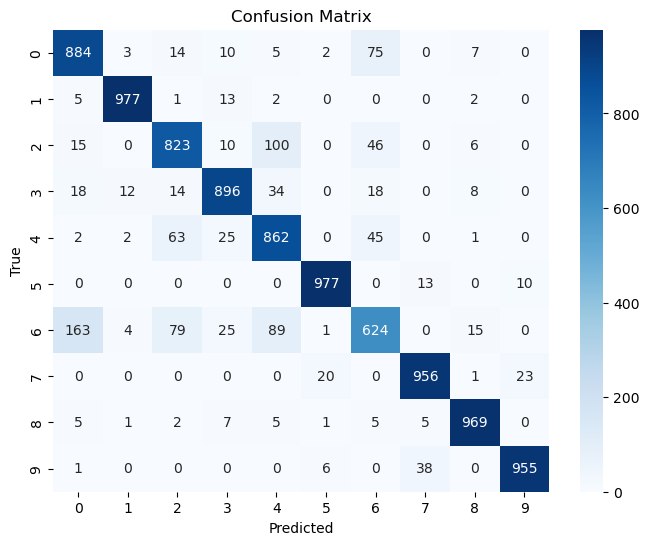

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [19]:
print("The model achieved an accuracy of", fashion_test_acc, "on the Fashion MNIST test set and... \n achieved an accuracy of", mnist_test_acc, "on the MNIST test set")

The model achieved an accuracy of 0.892300009727478 on the Fashion MNIST test set and... 
 achieved an accuracy of 0.9894000291824341 on the MNIST test set
